### Writting predict function

In [6]:
import timeit

mutual_wrong = {}

def predict_string(s1, s2, method, threshold):
    if (method(s1, s2) >= threshold):
        return 1
    return 0

def apply_traditional_method(method, threshold, dataset_path, out_path):
    start = timeit.default_timer()
    num_true_predicted_true = 0
    num_true_predicted_false = 0
    num_false_predicted_true = 0
    num_false_predicted_false = 0
    count = 0
    with open(dataset_path, "r", encoding="utf-8") as f:
        while (True):
            line = f.readline()
            if (line == ""):
                break
            count = count + 1
            line_split = line.split("\t")

            s1 = line_split[0].lower()
            s2 = line_split[1].lower()
            label = 1 if line_split[2].strip() == "TRUE" else 0
            predict = predict_string(s1, s2, method, threshold)

            if (predict == 1 and label == 1):
                num_true_predicted_true = num_true_predicted_true + 1
                if (line_split[0] in mutual_wrong):
                    del mutual_wrong[line_split[0]]
            elif (predict == 1 and label == 0):
                num_true_predicted_false = num_true_predicted_false + 1
                mutual_wrong[line_split[0]] = line_split[1]
            elif (predict == 0 and label == 1):
                num_false_predicted_true = num_false_predicted_true + 1
                mutual_wrong[line_split[0]] = line_split[1]
            elif (predict == 0 and label == 0):
                num_false_predicted_false = num_false_predicted_false + 1
                if (line_split[0] in mutual_wrong):
                    del mutual_wrong[line_split[0]]
            else:
                print("error line: ", line)

    stop = timeit.default_timer()
    acc, pre, rec, f1 = 0, 0, 0, 0
    if (count > 0):
        acc = (num_true_predicted_true + num_false_predicted_false) / (count)
    if (num_true_predicted_true + num_false_predicted_true > 0):
        pre = (num_true_predicted_true) / (num_true_predicted_true + num_false_predicted_true)
    if (num_true_predicted_true + num_true_predicted_false > 0):
        rec = (num_true_predicted_true) / (num_true_predicted_true + num_true_predicted_false)
    if (pre + rec > 0):
        f1 = 2.0 * ((pre * rec) / (pre + rec))
    # print("THRESHOLD: ", threshold)
    # print("Running time: ", stop - start)
    # print("Number of samples: ", count)
    # print("Accuracy: ", acc)
    # print("Precision: ", pre)
    # print("Recall: ", rec)
    # print("F1 score: ", f1)

    # Write result to file
    # with open(out_path, "a") as fout:
    #     out_string = "THRESHOLD: {:.2f}\n\tRunning time (sec.): {:.2f}\n\tNumber of samples: {}\n\tAccuracy: {:.4f}\n"
    #     out_string = out_string + "\tPrecision: {:.4f}\n\tRecall: {:.4f}\n\tF1 score: {:.4f}\n\n"
    #     fout.write(out_string.format(threshold, stop - start, count, acc, pre, rec, f1))
 
def prob_threshold(method, dataset_path, out_path, start=0.1, end=0.9, step=0.05):
    threshold = start
    while (threshold <= end):
        apply_traditional_method(method, threshold, dataset_path, out_path)
        threshold = threshold + step

### Test on ULAN test set

In [7]:
import DeezyMatch.traditional_string_matching as traditional_method

dataset_path="./dataset/finetuned-test.txt"
output_path="./output/traditional-method/"

In [ ]:
# Levenshtein
prob_threshold(traditional_method.levenshtein, dataset_path, output_path + "levenshtein.txt")
prob_threshold(traditional_method.damerau_levenshtein, dataset_path, output_path + "damerau_levenshtein.txt")
prob_threshold(traditional_method.jaro, dataset_path, output_path + "jaro.txt")
prob_threshold(traditional_method.jaro_winkler, dataset_path, output_path + "jaro_winkler.txt")
prob_threshold(traditional_method.sorted_jaro_winkler, dataset_path, output_path + "sorted_jaro_winkler.txt")
prob_threshold(traditional_method.cosine, dataset_path, output_path + "cosine.txt")
prob_threshold(traditional_method.jaccard, dataset_path, output_path + "jaccard.txt")
prob_threshold(traditional_method.overlap, dataset_path, output_path + "overlap.txt")
prob_threshold(traditional_method.dice, dataset_path, output_path + "dice.txt")
prob_threshold(traditional_method.soft_jaccard, dataset_path, output_path + "soft_jaccard.txt")
prob_threshold(traditional_method.monge_elkan, dataset_path, output_path + "monge_elkan.txt")
#prob_threshold(traditional_method.permuted_winkler, dataset_path, output_path + "permuted_winkler.txt")
#prob_threshold(traditional_method.skipgram, dataset_path, output_path + "skipgram.txt")
prob_threshold(traditional_method.davies, dataset_path, output_path + "davies.txt")
print("Done")

In [2]:
# WIKIDATA
import DeezyMatch.traditional_string_matching as traditional_method

dataset_path="./dataset/wikidata-test.txt"
output_path="./output/traditional-method/wiki"

prob_threshold(traditional_method.damerau_levenshtein, dataset_path, output_path + "damerau_levenshtein.txt")
prob_threshold(traditional_method.monge_elkan, dataset_path, output_path + "monge_elkan.txt")

### Samples that all methods predict wrong

In [8]:
apply_traditional_method(traditional_method.levenshtein, 0.3, dataset_path, output_path + "levenshtein.txt")
apply_traditional_method(traditional_method.damerau_levenshtein, 0.3, dataset_path, output_path + "damerau_levenshtein.txt")
apply_traditional_method(traditional_method.jaro, 0.6, dataset_path, output_path + "jaro.txt")
apply_traditional_method(traditional_method.jaro_winkler, 0.6, dataset_path, output_path + "jaro_winkler.txt")
apply_traditional_method(traditional_method.sorted_jaro_winkler, 0.65, dataset_path, output_path + "sorted_jaro_winkler.txt")
apply_traditional_method(traditional_method.cosine, 0.65, dataset_path, output_path + "cosine.txt")
apply_traditional_method(traditional_method.jaccard, 0.5, dataset_path, output_path + "jaccard.txt")
apply_traditional_method(traditional_method.overlap, 0.85, dataset_path, output_path + "overlap.txt")
apply_traditional_method(traditional_method.dice, 0.65, dataset_path, output_path + "dice.txt")
apply_traditional_method(traditional_method.soft_jaccard, 0.5, dataset_path, output_path + "soft_jaccard.txt")
apply_traditional_method(traditional_method.monge_elkan, 0.7, dataset_path, output_path + "monge_elkan.txt")
apply_traditional_method(traditional_method.davies, 0.6, dataset_path, output_path + "davies.txt")
print("Done")

Done


In [16]:
#Write result to file
with open("./output/traditional-method/mutual_wrong.txt", "w", encoding="utf8") as fout:
    for x in mutual_wrong:
        string = x + "\t" + mutual_wrong[x] + "\n"
        fout.write(string)

In [18]:
mutual_wrong

{'Lemens J. van': 'Veuve Lemens',
 'Silvy Sani': 'סני סילבי',
 'Ettore Colla': 'קולה אטורה',
 'Bouman Johanna Laura': 'Kruijder-Bouman Jo',
 '박수근': 'Pak Su-gŭn',
 '石川 義': 'Ishikawa Tadashi',
 'Suss Dr.': "דר' סוס",
 'Reuven Gross': 'גרוס ראובן',
 "אלורה ג'ניפר": 'Allora Jennifer',
 'Piccini Elisabetta': 'Suor I. P.',
 'אלקלעי שי': 'Alkalay Shay',
 'Laberador': 'Juan Fernández',
 'שאול נעמי': 'Shaul Naomi',
 'Visconti Tedaldo': 'Gregorius PP. X beato',
 'Arnold Newman': 'ניומן ארנולד',
 'Newman Abner': 'ניומן ארנולד',
 "בונוורדי מרצ'לו": 'Marcelo Bonevardi',
 'Seijiro': 'Yoshihiko Yoshida',
 'מלרמה סטפן': 'Mallarme Steph.',
 'Mitello': 'Agostino',
 'Pseudo-Bede': 'Venerabilis Baede',
 'Anglicus Beda': 'Pseudo-Bede',
 'Eliahu Dallal': 'דלל אליהו',
 'Bach Yehudith': 'בך יהודית',
 'Guardolino': 'Carlo Natali',
 'Grey Squirrel': 'Patrick Swazo Hinds',
 'Giusto Da Guanto': 'Joos van Wassenhove',
 'Laor Marc': 'לאור מרק',
 'Doyle Chris': 'To Ho Fung',
 'בסקין מוריס': 'Maurice Baskine',
 '大智 勝

In [1]:
a = ["Michael Jackson",
"Micheal Jackson",
"MichaelJackson",
"Michael-Jackson",
"Michael Joseph Jackson",
"Michael Joe Jackson",
"Jackson, Michael",
"Jackson, Michael Joseph",
"Майкл Джексон",
"Μάϊκλ Τζάκσον",
"マイケルジャクソン",
"M. J.",
"M. Jackson",
"Michael J. Jackson",
"M. J. Jackson",
"Mr. Jackson",
'MJ',
"King of Pop"]
query = "Michael Jackson"

In [5]:
import DeezyMatch.traditional_string_matching as traditional_method
result = {}
for cand in a:
    score = str(traditional_method.monge_elkan(query, cand))[:4]
    result[cand] = score 
    #print(cand, score)

re = dict(sorted(result.items(), key=lambda item: item[1], reverse=True))
for x in re:
    print(re[x], x)

1.0 Michael Jackson
0.98 Micheal Jackson
0.98 Jackson, Michael
0.92 Michael Joseph Jackson
0.92 Michael J. Jackson
0.91 Michael Joe Jackson
0.91 Jackson, Michael Joseph
0.77 M. Jackson
0.75 MichaelJackson
0.74 Michael-Jackson
0.74 Mr. Jackson
0.73 M. J. Jackson
0.54 M. J.
0.54 MJ
0.19 King of Pop
0.0 Майкл Джексон
0.0 Μάϊκλ Τζάκσον
0.0 マイケルジャクソン


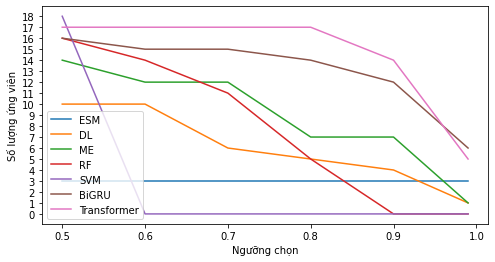

In [1]:
import matplotlib.pyplot as plt

thresh_hold = [0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
esm = [ 3,  3,  3,  3,  3,  3]
dl  = [10, 10,  6,  5,  4,  1]
me  = [14, 12, 12,  7,  7,  1]
rf  = [16, 14, 11,  5,  0,  0]
svm = [18,  0,  0,  0,  0,  0]
gru = [16, 15, 15, 14, 12,  6]
trans=[17, 17, 17, 17, 14,  5]
plt.figure(figsize=(8,4))
plt.plot(thresh_hold, esm, label="ESM")
plt.plot(thresh_hold, dl, label="DL")
plt.plot(thresh_hold, me, label="ME")
plt.plot(thresh_hold, rf, label="RF")
plt.plot(thresh_hold, svm, label="SVM")
plt.plot(thresh_hold, gru, label="BiGRU")
plt.plot(thresh_hold, trans, label="Transformer")
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.xlabel("Ngưỡng chọn")
plt.ylabel("Số lượng ứng viên")
plt.legend(loc="best")

plt.savefig('compare-mj.png')
plt.show()